In [3]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
from sklearn.model_selection import train_test_split



from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Dropout
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [0]:
train=df.drop(['Unnamed: 0'],axis=1)
train.shape
train_x=train.iloc[:,0:10]
train_y=train['type']

In [0]:
def create_model():    
    model = Sequential()
    model.add(Dense(64, kernel_initializer='normal',input_dim = train.shape[1]-1, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    model.summary()
    return model 

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 65        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
4867/4867 [==============================] - 0s 20us/step


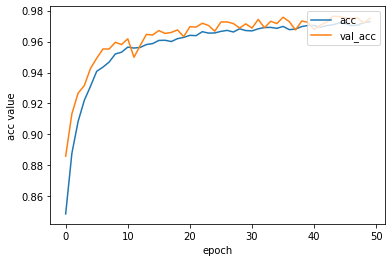

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 65        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
4866/4866 [==============================] - 0s 18us/step


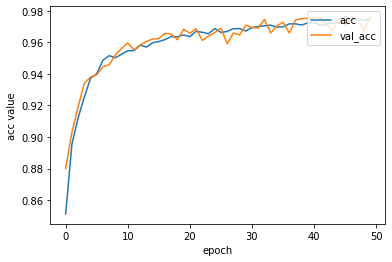

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 65        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
4866/4866 [==============================] - 0s 16us/step


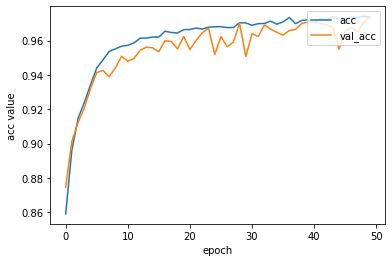

In [70]:
n_split = 3
lst=[]
for train_index, test_index in KFold(n_splits=n_split,shuffle = True).split(train):
    train_x=train.iloc[:,0:10]
    train_y=train['type']
    x_train,x_val=train_x.iloc[train_index,:],train_x.iloc[test_index,:]
    y_train,y_val=train_y.iloc[train_index],train_y.iloc[test_index]
    
    model = create_model()
    history = model.fit(x_train, y_train,batch_size = 10, epochs =50,verbose = 0,validation_data=(x_val,y_val))
    a=model.evaluate(x_val,y_val)[1]
    lst.append(a)
    epochs = range(len(history.history['acc']))
    plt.plot(history.history["acc"],label="acc")
    plt.plot(history.history['val_acc'], label = 'val_acc')
    plt.ylabel('acc value')
    plt.xlabel('epoch')
    plt.legend(loc="upper right")
    plt.show()
    

In [0]:
def create_model1():  
    # add 3 hidden layer with 128 hidden unit   
    model = Sequential()
    model.add(Dense(64, kernel_initializer='normal',input_dim = train.shape[1]-1, activation='relu'))
    model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1]-1, activation='relu'))
    model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1]-1, activation='relu'))
    model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1]-1, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    model.summary()
    return model 

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_49 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_50 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_51 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 129       
Total params: 42,177
Trainable params: 42,177
Non-trainable params: 0
_________________________________________________________________
4867/4867 [==============================] - 0s 22us/step


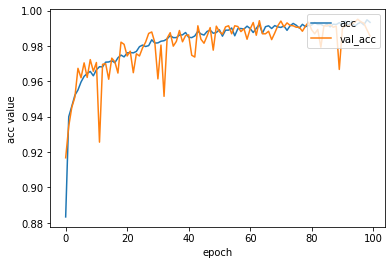

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_54 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_55 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_56 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 129       
Total params: 42,177
Trainable params: 42,177
Non-trainable params: 0
_________________________________________________________________
4866/4866 [==============================] - 0s 21us/step


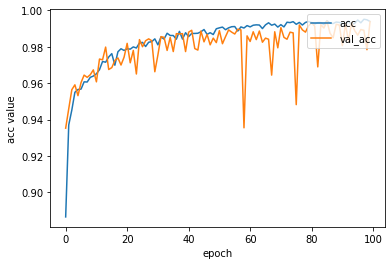

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_59 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_60 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_61 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 129       
Total params: 42,177
Trainable params: 42,177
Non-trainable params: 0
_________________________________________________________________
4866/4866 [==============================] - 0s 23us/step


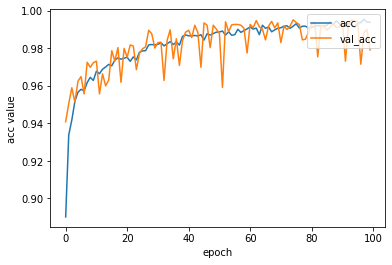

In [73]:
n_split = 3
lst1=[]
for train_index, test_index in KFold(n_splits=n_split,shuffle = True).split(train):
    train_x=train.iloc[:,0:10]
    train_y=train['type']
    x_train,x_val=train_x.iloc[train_index,:],train_x.iloc[test_index,:]
    y_train,y_val=train_y.iloc[train_index],train_y.iloc[test_index]
    
    model = create_model1()
    history = model.fit(x_train,np.array(y_train).reshape(len(y_train),),batch_size = 10, epochs =100,verbose = 0,validation_data=(x_val,np.array(y_val).reshape(len(y_val),)))
    a=model.evaluate(x_val,y_val)[1]
    lst1.append(a)
    epochs = range(len(history.history['acc']))
    plt.plot(history.history["acc"],label="acc")
    plt.plot(history.history['val_acc'], label = 'val_acc')
    plt.ylabel('acc value')
    plt.xlabel('epoch')
    plt.legend(loc="upper right")
    plt.show()
    

In [0]:
def create_model2():  
    # add 3 hidden layer with 128 hidden unit  with tanh  
    model = Sequential()
    model.add(Dense(64, kernel_initializer='normal',input_dim = train.shape[1]-1, activation='tanh'))
    model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1]-1, activation='tanh'))
    model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1]-1, activation='tanh'))
    model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1]-1, activation='tanh'))
    model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    model.summary()
    return model 

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_64 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_65 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_66 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 129       
Total params: 42,177
Trainable params: 42,177
Non-trainable params: 0
_________________________________________________________________
4867/4867 [==============================] - 0s 20us/step


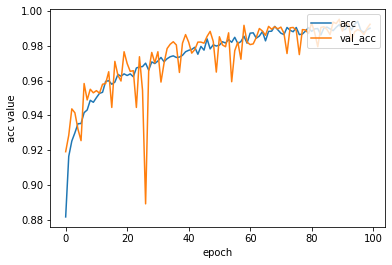

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_69 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_70 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_71 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 129       
Total params: 42,177
Trainable params: 42,177
Non-trainable params: 0
_________________________________________________________________
4866/4866 [==============================] - 0s 22us/step


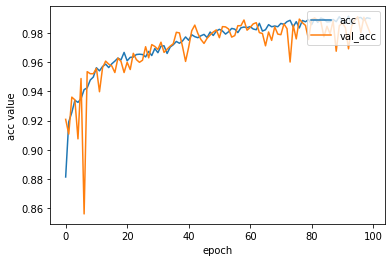

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_74 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_75 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_76 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 129       
Total params: 42,177
Trainable params: 42,177
Non-trainable params: 0
_________________________________________________________________
4866/4866 [==============================] - 0s 23us/step


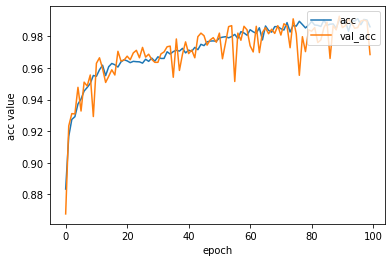

In [75]:
n_split = 3
lst2=[]
for train_index, test_index in KFold(n_splits=n_split,shuffle = True).split(train):
    train_x=train.iloc[:,0:10]
    train_y=train['type']
    x_train,x_val=train_x.iloc[train_index,:],train_x.iloc[test_index,:]
    y_train,y_val=train_y.iloc[train_index],train_y.iloc[test_index]
    
    model = create_model2()
    history = model.fit(x_train,np.array(y_train).reshape(len(y_train),),batch_size = 10, epochs =100,verbose = 0,validation_data=(x_val,np.array(y_val).reshape(len(y_val),)))
    a=model.evaluate(x_val,y_val)[1]
    lst2.append(a)
    epochs = range(len(history.history['acc']))
    plt.plot(history.history["acc"],label="acc")
    plt.plot(history.history['val_acc'], label = 'val_acc')
    plt.ylabel('acc value')
    plt.xlabel('epoch')
    plt.legend(loc="upper right")
    plt.show()
    

In [92]:
np.average(lst),np.average(lst1),np.average(lst2),np.average(lst4)

# it looks like the second one wins the battle, but the validation accuracy is oscilating, we will try the final one with regularization 

(0.9750667810440063, 0.9861634771029154, 0.980340301990509, 0.9842456976572672)

In [0]:
def create_model4():
    model = Sequential()
    model.add(Dense(256, input_dim=train.shape[1]-1))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    adam=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer=adam, 
                  metrics=['acc']
                 )
    model.summary()
    return model

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 256)               2816      
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_12 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 1)               

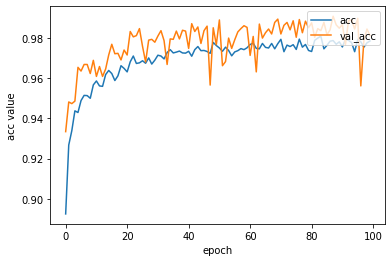

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 256)               2816      
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 1)               

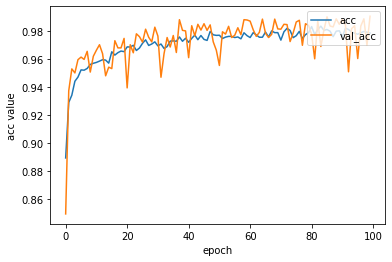

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 256)               2816      
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 1)               

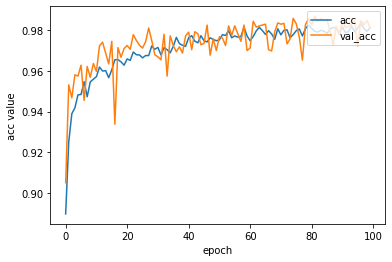

In [89]:
n_split = 3
lst4=[]
for train_index, test_index in KFold(n_splits=n_split,shuffle = True).split(train):
    train_x=train.iloc[:,0:10]
    train_y=train['type']
    x_train,x_val=train_x.iloc[train_index,:],train_x.iloc[test_index,:]
    y_train,y_val=train_y.iloc[train_index],train_y.iloc[test_index]
    
    model = create_model4()
    history = model.fit(x_train,np.array(y_train).reshape(len(y_train),),batch_size = 10, epochs =100,verbose = 0,validation_data=(x_val,np.array(y_val).reshape(len(y_val),)))
    a=model.evaluate(x_val,y_val)[1]
    lst4.append(a)
    epochs = range(len(history.history['acc']))
    plt.plot(history.history["acc"],label="acc")
    plt.plot(history.history['val_acc'], label = 'val_acc')
    plt.ylabel('acc value')
    plt.xlabel('epoch')
    plt.legend(loc="upper right")
    plt.show()
    

In [12]:
# good performance second best  
checkpoint_name = 'Weights-{epoch:03d}--{val_acc:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_acc', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
final_model = create_model4()
history = final_model.fit(train_x,train_y,batch_size = 10, epochs =150,verbose = 0,callbacks=callbacks_list,validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               2816      
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [14]:
uploaded = files.upload()
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test.csv


In [19]:
#test.drop(['Unnamed: 0'],axis=1,inplace=True)
test_x=test.iloc[:,:10]
test_y=test.loc[:,'type']

0       1
1       0
2       1
3       1
4       1
       ..
3645    1
3646    1
3647    0
3648    1
3649    1
Name: type, Length: 3650, dtype: int64

In [24]:
final_model.load_weights('Weights-142--0.99315.hdf5')
final_model.evaluate(test_x,test_y)

3650/3650 [==============================] - 0s 26us/step


[0.0334702351333404, 0.9876712560653687]